# Convex hull and intersection

### Introduction

These examples illustrate common operations on polyhedra using [Polyhedra.jl](https://github.com/JuliaPolyhedra/Polyhedra.jl):

- The convex hull of the union of polytopes
- The intersection of polytopes

We start by choosing a polyhedral library that will be used for computing the H-representation from the V-representation and vice-versa as well as removing redundant points.
In these example, we use the default library available in Polyhedra but it can be replaced by any other library listed [here](https://juliapolyhedra.github.io/), e.g. by changing the last two lines below by `import CDDLib` and `lib = CDDLib.Library()` to use [CDDLib](https://github.com/JuliaPolyhedra/CDDLib.jl).

In [1]:
using Polyhedra
import GLPK
lib = DefaultLibrary{Float64}(GLPK.Optimizer)

DefaultLibrary{Float64}(GLPK.Optimizer)

### Convex hull

The binary convex hull operation between two polyhedra is obtained with the [`convexhull`](https://juliapolyhedra.github.io/Polyhedra.jl/latest/utilities.html#Polyhedra.convexhull) function.

Below we compute the convex hull of the union of two polygons from their V-representation.

In [2]:
P1 = polyhedron(vrep([
    -1.9 -1.7
    -1.8  0.5
     1.7  0.7
     1.9 -0.3
     0.9 -1.1
]), lib)

P2 = polyhedron(vrep([
    -2.5 -1.1
    -0.8  0.8
     0.1  0.9
     1.8 -1.2
     1.3  0.1
]), lib)

Pch = convexhull(P1, P2)

Polyhedron DefaultPolyhedron{Float64, MixedMatHRep{Float64, Matrix{Float64}}, MixedMatVRep{Float64, Matrix{Float64}}}:
10-element iterator of Vector{Float64}:
 [-1.9, -1.7]
 [-1.8, 0.5]
 [1.7, 0.7]
 [1.9, -0.3]
 [0.9, -1.1]
 [-2.5, -1.1]
 [-0.8, 0.8]
 [0.1, 0.9]
 [1.8, -1.2]
 [1.3, 0.1]

Note that the convex hull operation is done in the V-representation so no representation conversion is needed for this operation since `P1` and `P2` where constructed from their V-representation:

In [3]:
hrepiscomputed(P1), hrepiscomputed(P2), hrepiscomputed(Pch)

(false, false, false)

Let us note that the `convexhull` of a V-representation contains points and rays and represents the convex hull of the points together with the conic hull of the rays. So, `convexhull(P1, P2)` does the union of the vertices:

In [4]:
npoints(Pch)

10

However, if we want to remove the redundant points we can use `removevredundancy!`:

In [5]:
removevredundancy!(Pch)
npoints(Pch)

8

We can plot the polygons and the convex hull of their union using the `plot` function. For further plotting options see the [Plots.jl](http://docs.juliaplots.org/latest/) documentation.
We can see below the 8 redundant points highlighted with green dots, the two points that are not highlighted are the redundant ones.

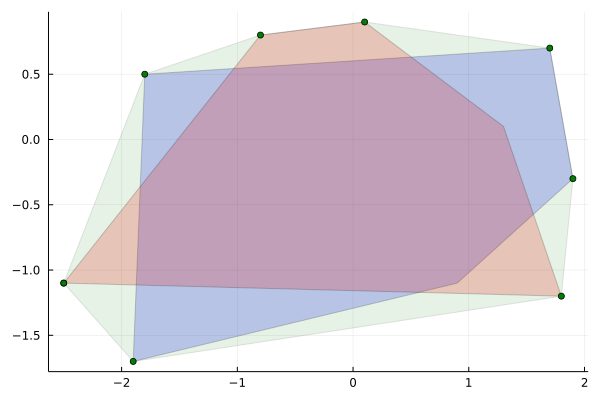

In [6]:
using Plots
plot(P1, color="blue", alpha=0.2)
plot!(P2, color="red", alpha=0.2)
plot!(Pch, color="green", alpha=0.1)
scatter!(Pch, color="green")

### Intersection

Intersection of polyhedra is obtained with the [`intersect`](https://juliapolyhedra.github.io/Polyhedra.jl/latest/utilities.html#Base.intersect) function.

Below we compute the intersection of the two polygons from the previous example.

In [7]:
Pint = intersect(P1, P2)

Polyhedron DefaultPolyhedron{Float64, MixedMatHRep{Float64, Matrix{Float64}}, MixedMatVRep{Float64, Matrix{Float64}}}:
10-element iterator of HalfSpace{Float64, Vector{Float64}}:
 HalfSpace([0.8000000000000002, -1.0], 1.8200000000000003)
 HalfSpace([0.10769992572418913, -0.5025996533795494], 0.6497895518692747)
 HalfSpace([0.8620689655172415, 0.17241379310344826], 1.5862068965517244)
 HalfSpace([-0.020661157024793403, 0.36157024793388426], 0.21797520661157022)
 HalfSpace([-0.10505862205243051, 0.004775391911474149], 0.19149321565011204)
 HalfSpace([0.6666666666666667, 1.0], 0.9666666666666668)
 HalfSpace([0.2977099236641222, 0.11450381679389314], 0.39847328244274816)
 HalfSpace([-0.11904761904761907, 1.0714285714285714], 0.9523809523809523)
 HalfSpace([-0.293965961835998, 0.26302217637957714], 0.44559051057246)
 HalfSpace([-0.004026150808106009, -0.17312448474855732], 0.20050231024367796)

While `P1` and `P2` have been constructed from their V-representation, their H-representation has been computed to build the intersection `Pint`.

In [8]:
hrepiscomputed(P1), vrepiscomputed(P1), hrepiscomputed(P2), vrepiscomputed(P2)

(true, true, true, true)

On the other hand, `Pint` is constructed from its H-representation hence its V-representation has not been computed yet.

In [9]:
hrepiscomputed(Pint), vrepiscomputed(Pint)

(true, false)

We can obtain the number of points in the intersection with `npoints` as follows:

In [10]:
npoints(Pint)

8

Note that this triggers the computation of the V-representation:

In [11]:
hrepiscomputed(Pint), vrepiscomputed(Pint)

(true, true)

We can plot the polygons and their intersection using the `plot` function.

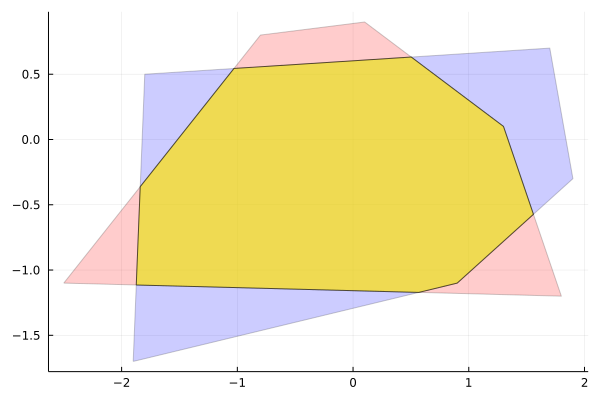

In [12]:
using Plots
plot(P1, color="blue", alpha=0.2)
plot!(P2, color="red", alpha=0.2)
plot!(Pint, color="yellow", alpha=0.6)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*